In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
df=pd.read_csv("Chicago_Crimes_2012_to_2017.csv")
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


### Convert dates  to pandas datetime format

In [7]:
df.Date=pd.to_datetime(df.Date,format='%m/%d/%Y %I:%M:%S %p')

### set the index to be the date will help us a lot later on

In [8]:
df.index=pd.DatetimeIndex(df.Date)
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


#### Adding time hour for easy grouping later

In [9]:
df["time_hour"]=df["Date"].apply(lambda x:x.hour)
df["month"]=df["Date"].apply(lambda x:x.month)
df["year"]=df["Date"].apply(lambda x:x.year)


In [10]:
df=df[df['year']!=2017]
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,time_hour,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",23,5,2016
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",21,5,2016
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",23,5,2016
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",22,5,2016
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",22,5,2016


### Analysing most frequent crime code

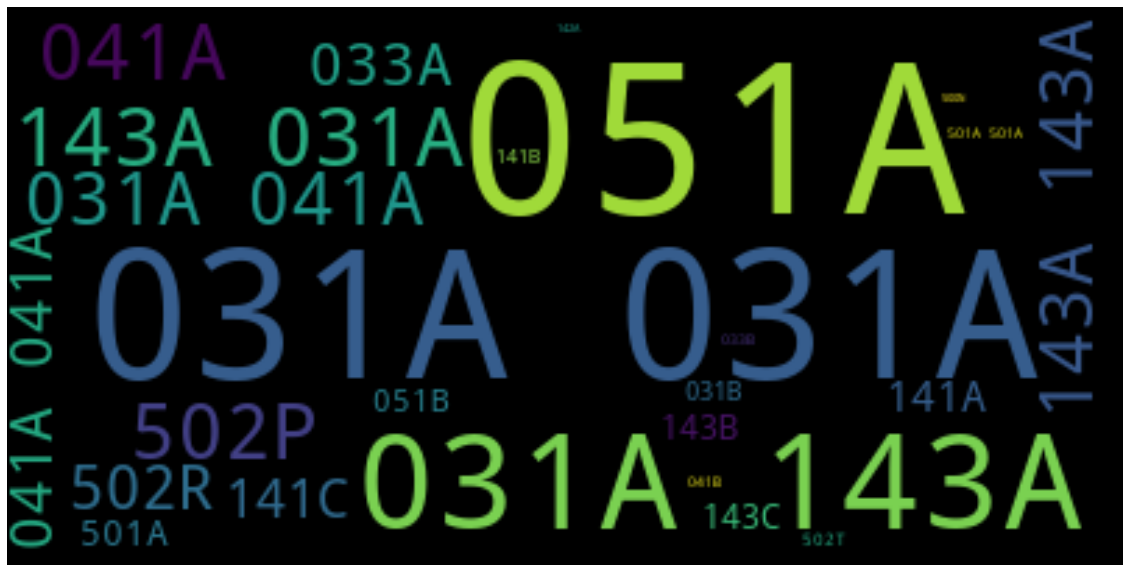

In [11]:
#join together a single string of IUCR codes
crime_types_code=' '.join(crime for crime in df['IUCR'])
# generate image

crime_code_wordcloud=WordCloud().generate(crime_types_code)
#plot wordcloude image

plt.figure(figsize=[20,20])
plt.imshow(crime_code_wordcloud,interpolation='bilinear')
plt.axis('off')
#store file
plt.savefig('us_wing.png',format='png')
plt.show()

### codes
https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e/data

## Chicago's crime by location

In [12]:
#Drop NaN values in['Block cloumn']
df_wordcloud=df.copy()
df_wordcloud.dropna(axis=0,subset=['Block'],inplace=True)


In [13]:
#create string of block codes and USA flag image mask
crime_types_location=' '.join(crime for crime in df_wordcloud["Block"])
mask=np.array(Image.open("us.png"))

#create and generate a word cloud image
crime_location_wordcloud=WordCloud(background_color="white",mode="RGBA",
                                   max_words=1000,mask=mask).generate(crime_types_location)



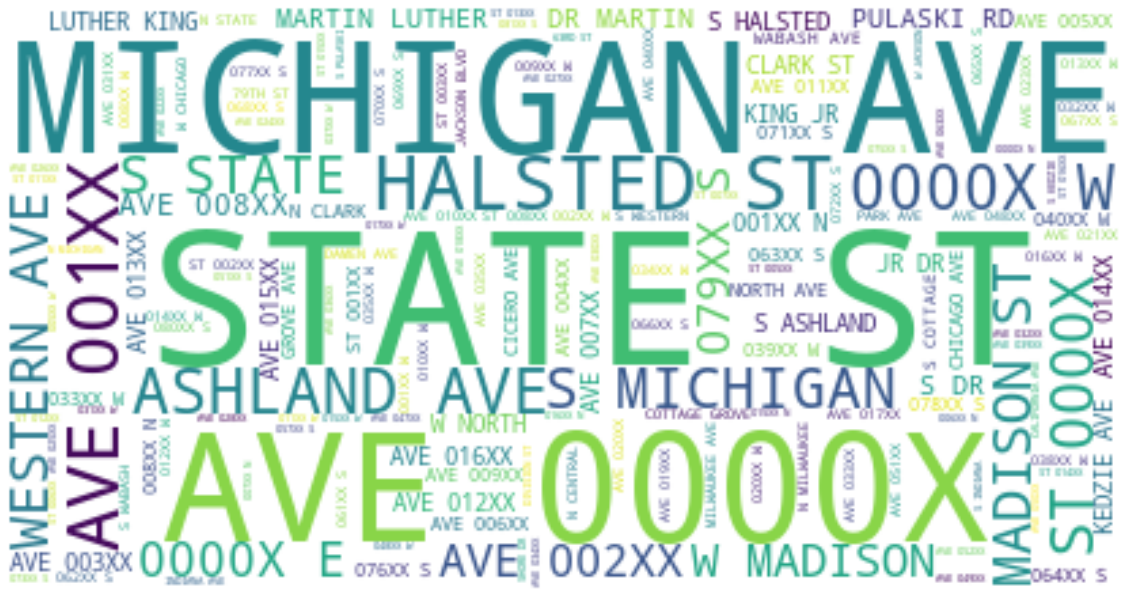

In [14]:
#create colouring from image and plot wordcloud
image_colors=ImageColorGenerator (mask)
plt.figure(figsize=[20,20])
plt.imshow(crime_location_wordcloud, interpolation="bilinear")
plt.axis("off")

#plt.savefig("img/us_wine.png", format="png")
plt.show()


### Yearly crime Trend Analysis

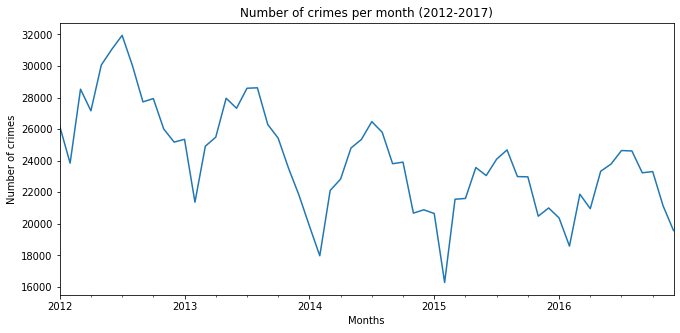

In [15]:
plt.figure(figsize=(11,5))

#resamplying time series by month
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2012-2017)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

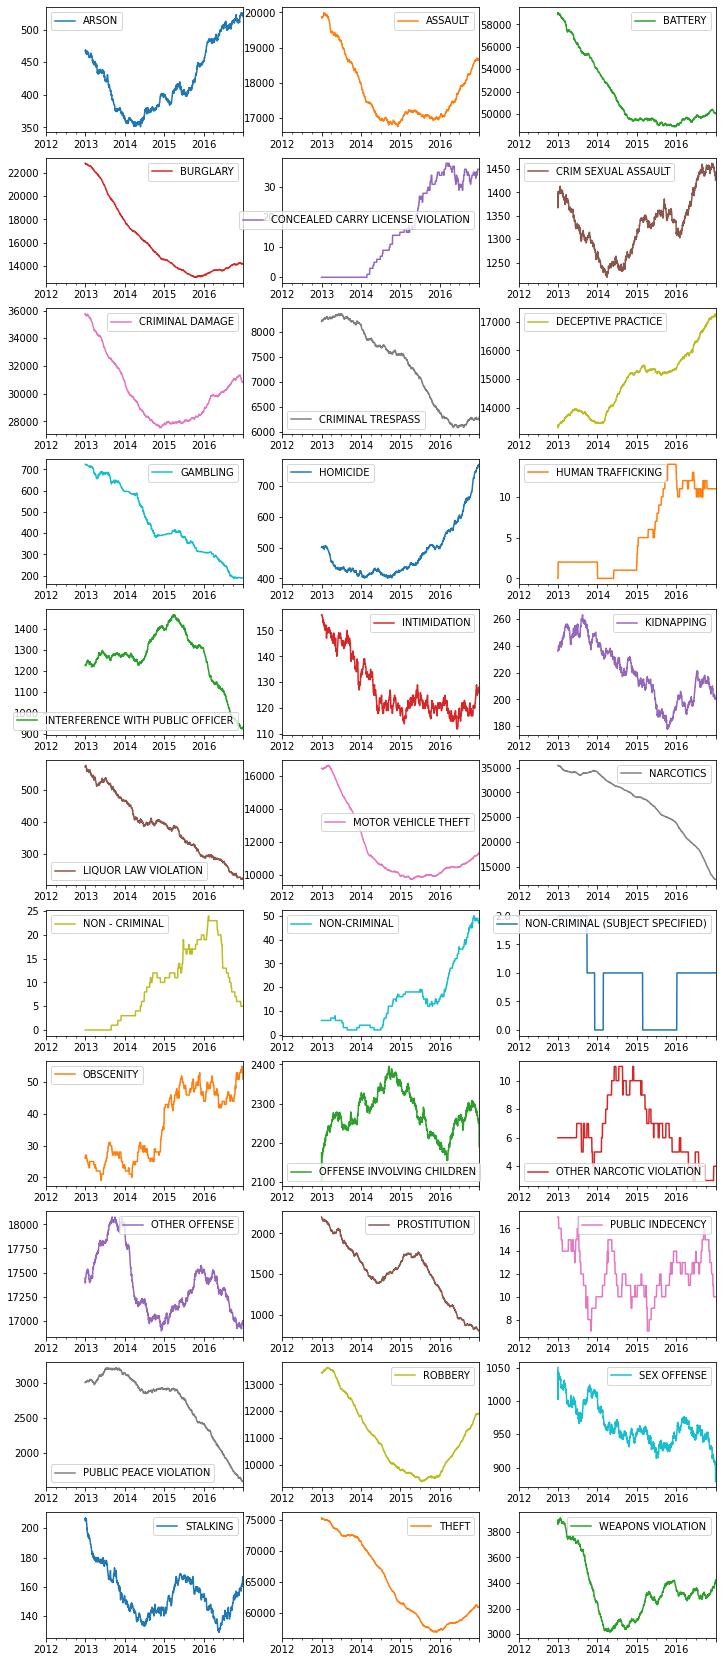

In [16]:
crimes_count_date=df.pivot_table('ID',aggfunc=np.size, columns='Primary Type',index=df.index.date,fill_value=0)
crimes_count_date.index=pd.DatetimeIndex(crimes_count_date.index)
plots=crimes_count_date.rolling(365).sum().plot(figsize=(12,30),subplots=True,layout=(-1,3),sharex=False,sharey=False)

## MOnthly and Hourly crime trend anylisis

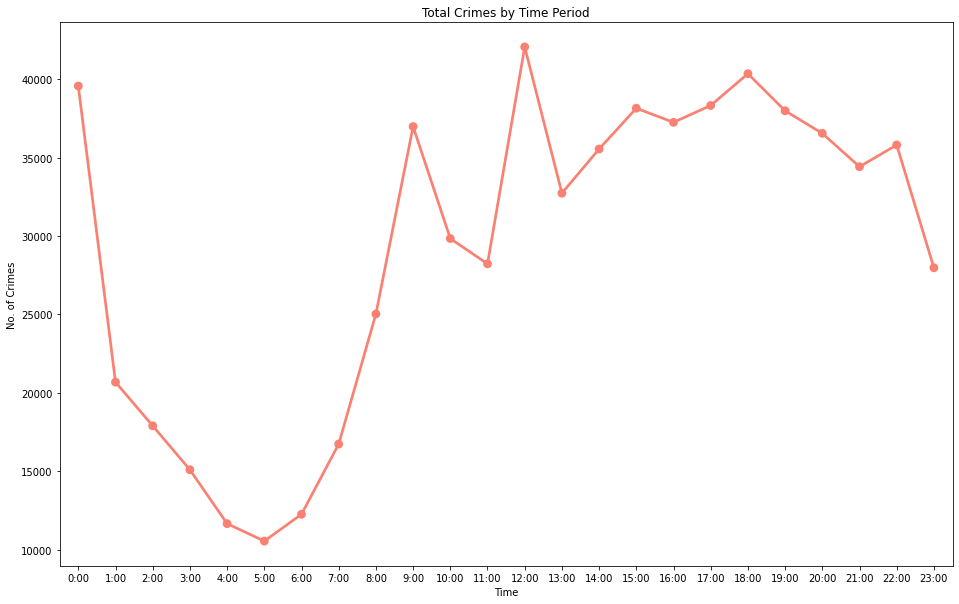

In [17]:
# Just to see overall crime trend by hourly periods, we can see which timings have the highest amount of crime
crimes_by_time = df.copy ()

# Define our important top 10 crime types
primary_types = ["ARSON", "CONCEALED CARRY LICENSE VIOLATION", 'CRIM SEXUAL ASSAULT','DECEPTIVE PRACTICE', 'HOMICIDE', 
                 'ROBBERY',"THEFT", "WEAPONS VIOLATION", 'MOTOR VEHICLE THEFT','CRIMINAL DAMAGE']

# Filter out rows with only the top 10 crimes mentioned above
crimes_by_time = crimes_by_time [crimes_by_time ['Primary Type'].isin (primary_types)]

# Group crimes by time hour
crimes_by_time = crimes_by_time.groupby('time_hour').size().reset_index (name='No. of Crimes')
crimes_by_time ['hours'] = crimes_by_time['time_hour'].apply(lambda x: str(x)+':00')

# Plot crimes by time period
fig = plt.figure (figsize=(16, 10))
sns.pointplot (data=crimes_by_time, x="hours", y="No. of Crimes", color="salmon")
# Set labels & title
plt.xlabel ('Time')
plt.ylabel ('No. of Crimes')
plt.title('Total Crimes by Time Period')
plt.show()


#### Group crimes by types

<AxesSubplot:title={'center':'No. of Crimes by Type'}, xlabel='time_hour'>

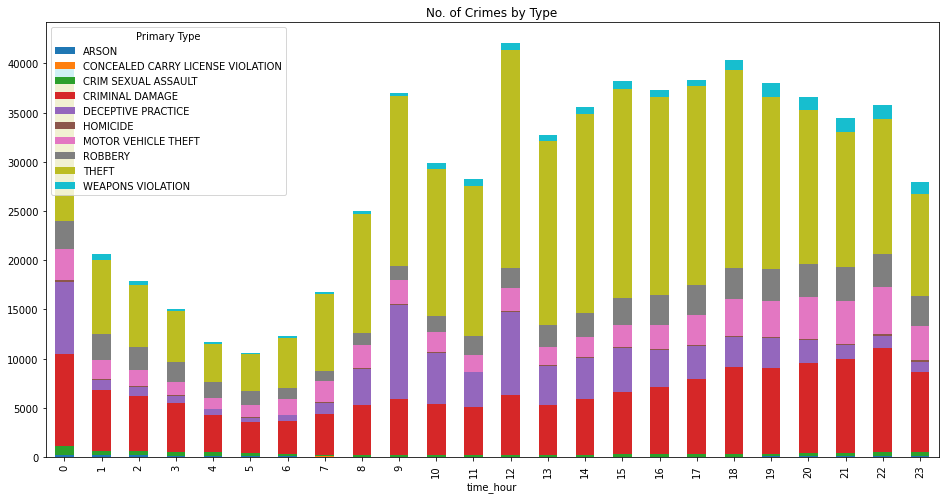

In [21]:
# Group Crimes by type
crimes_by_type = df.copy ()

crimes_by_type = crimes_by_type [crimes_by_type ['Primary Type'].isin (primary_types)]

crimes_by_type = crimes_by_type.groupby(['time_hour', 'Primary Type']).size().reset_index (name='No. of Crimes')

# Format hour data
crimes_by_type ['hours'] = crimes_by_type ['time_hour'].apply(lambda x: str(x) +':00')

# Crete crime type pivot table
crimes_by_type_pivot = pd.pivot_table (crimes_by_type, index=['time_hour'], columns=['Primary Type'],
                                       values='No. of Crimes', aggfunc=np. sum)

# Create stacked bar chart of crime types, compared hourly
crimes_by_type_pivot.plot (kind='bar', stacked=True, figsize=(16,8),
                           title="No. of Crimes by Type")




####  crimes by months

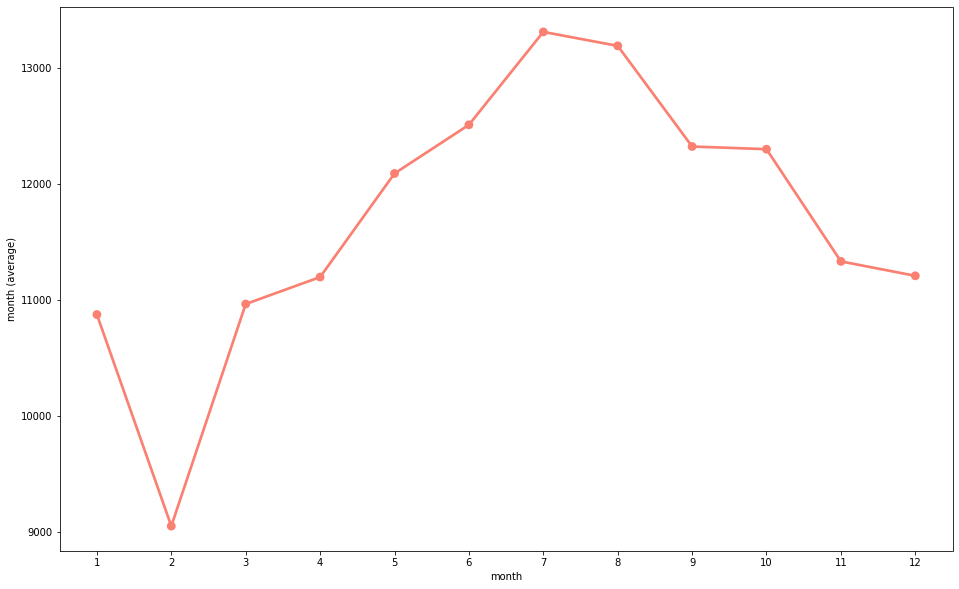

In [27]:
crimes_by_month=df.copy()

crimes_by_month=crimes_by_month[crimes_by_month['Primary Type'].isin(primary_types)]

crimes_by_month=crimes_by_month.groupby('month').size().reset_index(name='No. of crimes')

crimes_by_month['month (average)'] = crimes_by_month["No. of crimes"].apply(lambda x :x/5)

fig=plt.figure(figsize=(16,10))

sns.pointplot (data=crimes_by_month, x='month', y='month (average)', color="salmon")

plt.xlabel=('Month')
plt.ylabel=('No of crimes')
plt.title=("Average no of crimes by month")
plt.show()

#### RATIO OF CRIME ARREST BASED ON CRIME TYPES


<AxesSubplot:title={'center':'No. of Crimes by Type'}, ylabel='Primary Type'>

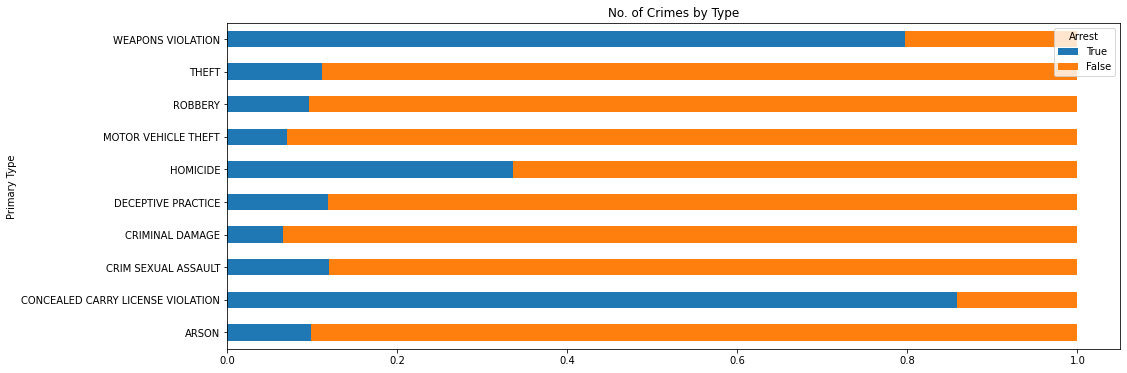

In [28]:
# Group by crime primary types and arrest
crimes_by_arrest = df.copy ()
crimes_by_arrest = crimes_by_arrest.groupby ( ['Primary Type', 'Arrest']).size().reset_index (name='No. of Crimes')

# Filter for top 10 crime primary types mentioned earlier
crimes_by_arrest = crimes_by_arrest[crimes_by_arrest['Primary Type'].isin (primary_types)]

# Create pivot table
crimes_by_arrest_pivot = pd.pivot_table (crimes_by_arrest, index=['Primary Type'],
                                         columns=['Arrest'], values='No. of Crimes',aggfunc=np.sum)
crimes_by_arrest_pivot = crimes_by_arrest_pivot.reset_index ()

# Create new columns in pivot table: ["Total No."], ["True"], ["False"]
crimes_by_arrest_pivot['Total No'] = crimes_by_arrest_pivot [True] + crimes_by_arrest_pivot[False]
crimes_by_arrest_pivot['True'] = crimes_by_arrest_pivot [True] / crimes_by_arrest_pivot['Total No']
crimes_by_arrest_pivot['False'] = crimes_by_arrest_pivot[False] /crimes_by_arrest_pivot['Total No']

crimes_by_arrest_pivot = crimes_by_arrest_pivot[['Primary Type', 'True', 'False']]
crimes_by_arrest_pivot = crimes_by_arrest_pivot.set_index ('Primary Type')

# Plot stacked bar chart of Arrest success for the 10 different crimes
crimes_by_arrest_pivot.plot (kind='barh', stacked=True, figsize = (16,6), title="No. of Crimes by Type")

#### MAJOR CRIMES MONTHLY ARREST ANALYSIS¶

In [29]:
# Concatenate ("Primary Type"] & ["Description"] together to make a new column
df['Details'] = df['Primary Type']+ ', ' + df['Description']

# Group by crime details and show top 10 crimes with highest arrest rates
top_crimes = df.groupby ( ['Details']) ['Arrest'].count()

top_crimes = pd. DataFrame (top_crimes).nlargest (10, 'Arrest').reset_index()
top_crimes =list (top_crimes ['Details'])

top_crimes

['THEFT, $500 AND UNDER',
 'BATTERY, DOMESTIC BATTERY SIMPLE',
 'BATTERY, SIMPLE',
 'THEFT, OVER $500',
 'CRIMINAL DAMAGE, TO VEHICLE',
 'CRIMINAL DAMAGE, TO PROPERTY',
 'ASSAULT, SIMPLE',
 'NARCOTICS, POSS: CANNABIS 30GMS OR LESS',
 'BURGLARY, FORCIBLE ENTRY',
 'MOTOR VEHICLE THEFT, AUTOMOBILE']

####  Next, we plot a heatmap based on top crime description and months.¶

<AxesSubplot:title={'center':'Major crimes (January - December)'}, xlabel='month', ylabel='Details'>

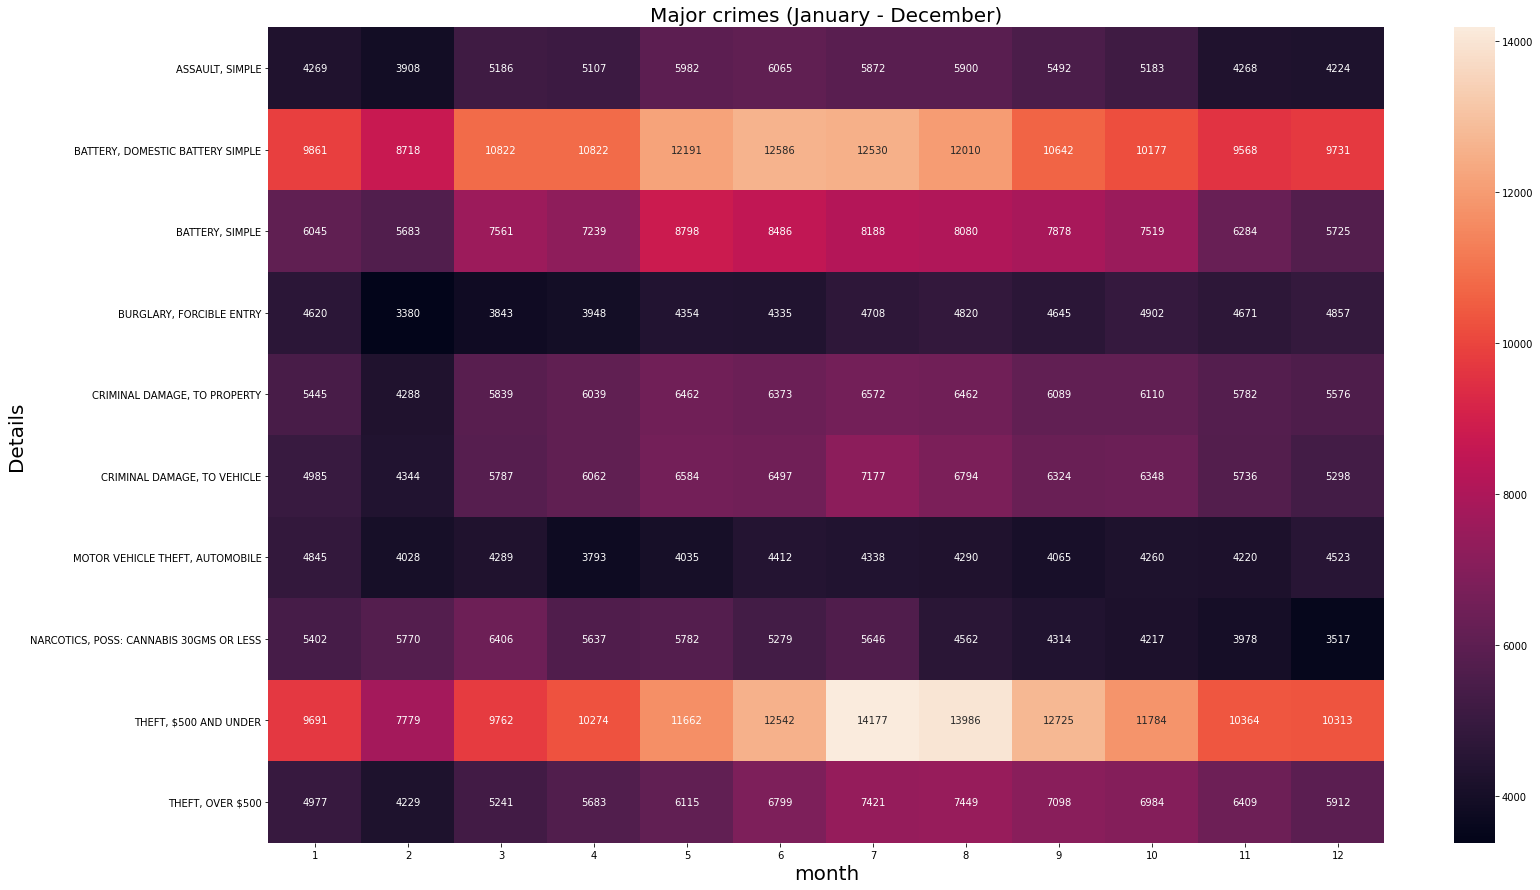

In [30]:
df2=df.groupby ( ['Details', 'month']) ['Arrest'].count()

#chart formatting
DIMS=(25, 15)

fig =plt.figure (figsize=DIMS)
ax1 =fig.add_subplot (111)

ax1.set_title('Major crimes (January - December)', fontsize=20)
ax1.set_ylabel ('Details', fontsize=20)
ax1.set_xlabel ('month', fontsize=20)

# Get top 20 data
df2 =pd. DataFrame (df2).reset_index()

df2 =df2[df2['Details'].isin (top_crimes)]

# Pivot data to 2D table, and fill all na values
df2 =df2. pivot_table (index='Details',columns='month', values='Arrest')

df2.fillna(0, inplace=True)

# Create heatmap
sns.heatmap (df2, annot=True, fmt='g')
